In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'

In [14]:
# fission and capture cross sections
sigma_f_slow_235, sigma_c_slow_235 = 584.4, 98.81
sigma_f_slow_238, sigma_c_slow_238 = 0, 2.717
sigma_slow_235 = sigma_f_slow_235 + sigma_c_slow_235
sigma_slow_238 = sigma_f_slow_238 + sigma_c_slow_238
# 
nu_slow_235 = 2.421
nu_slow_238 = 2.448

# fission and capture cross sections
sigma_f_fast_235, sigma_c_fast_235 = 1.235, 0.08907
sigma_f_fast_238, sigma_c_fast_238 = 0.3084, 2.661
sigma_fast_235 = sigma_f_fast_235 + sigma_c_fast_235
sigma_fast_238 = sigma_f_fast_238 + sigma_c_fast_238
# 
nu_fast_235 = 2.637
nu_fast_238 = 2.655

In [9]:
sigma_235

1.32407

In [17]:
def sigma_total(F, neutron_speed='fast'):
    if neutron_speed == 'fast':
        sigma_t = sigma_fast_235 * F + sigma_fast_238 * (1-F)
    else: #neutron_speed == 'slow':
        sigma_t = sigma_slow_235 * F + sigma_slow_238 * (1-F)
    return sigma_t

In [30]:
def k_slow(F):
    return (F*nu_slow_235*sigma_f_slow_235 + (1-F)*nu_slow_238*sigma_f_slow_238) / sigma_total(F, neutron_speed='slow')
def k_fast(F):
    return (F*nu_fast_235*sigma_f_fast_235 + (1-F)*nu_fast_238*sigma_f_fast_238) / sigma_total(F, neutron_speed='fast')

In [31]:
# sigma_total(0.0072)
k_fast(0.0072), k_slow(0.0072)

(0.28278602383170176, 1.3374551227238114)

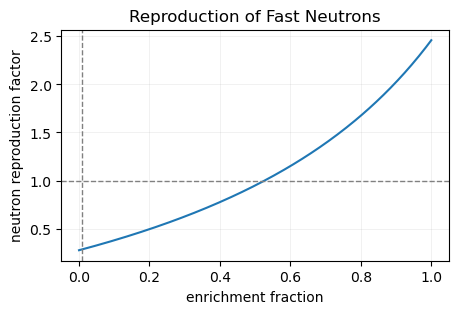

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
f_axis = np.linspace(0, 1, 200)
# ax.plot(f_axis, k_slow(f_axis), label='slow neutrons')
ax.plot(f_axis, k_fast(f_axis))#, label='fast neutrons')
ax.axhline(y=1, c='gray', ls='--', lw=1)
ax.axvline(x=0.0072, c='gray', ls='--', lw=1)
ax.grid(zorder=0, alpha=0.25, lw=0.5)
ax.set(xlabel='enrichment fraction', ylabel='neutron reproduction factor', title='Reproduction of Fast Neutrons');